In [1]:
import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
from tensorflow.keras import Sequential
from keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  SimpleRNN, Embedding,BatchNormalization, LSTM
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd    

# Data Checking

In [16]:
df = pd.read_csv("seq_train.csv",  header=None,skiprows=1)

In [17]:
print(df)

               0                                                  1
0          55964  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1          55965  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2          55966  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3          55967  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4          55968  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...          ...                                                ...
7842831  9548408  3052 91 91 330 3146 3381 624 504 3194 2325 314...
7842832  9548409  91 91 330 3146 3381 624 504 3194 2325 3146 200...
7842833  9548410  91 330 3146 3381 624 504 3194 2325 3146 2009 3...
7842834  9548411  330 3146 3381 624 504 3194 2325 3146 2009 3052...
7842835  9548412  3146 3381 624 504 3194 2325 3146 2009 3052 272...

[7842836 rows x 2 columns]


In [19]:
print(df[1])
print(df[1].shape)

0          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
                                 ...                        
7842831    3052 91 91 330 3146 3381 624 504 3194 2325 314...
7842832    91 91 330 3146 3381 624 504 3194 2325 3146 200...
7842833    91 330 3146 3381 624 504 3194 2325 3146 2009 3...
7842834    330 3146 3381 624 504 3194 2325 3146 2009 3052...
7842835    3146 3381 624 504 3194 2325 3146 2009 3052 272...
Name: 1, Length: 7842836, dtype: object
(7842836,)


In [20]:
df_check=pd.read_csv('seq_train.csv', header=None,nrows=5000,skiprows=1)

In [21]:
print(df_check)
print(df_check.shape)

           0                                                  1
0      55964  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1      55965  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2      55966  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3      55967  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4      55968  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...      ...                                                ...
4995  451554  313 504 624 386 1248 2729 1902 846 624 3381 33...
4996  451555  504 624 386 1248 2729 1902 846 624 3381 330 31...
4997  451556  624 386 1248 2729 1902 846 624 3381 330 313 12...
4998  451557  386 1248 2729 1902 846 624 3381 330 313 1248 6...
4999  451558  1248 2729 1902 846 624 3381 330 313 1248 624 5...

[5000 rows x 2 columns]
(5000, 2)


In [22]:
df_check=df_check[1].str.split(' ',expand=True)

In [23]:
print(df_check)

       0     1     2     3     4     5     6     7     8     9    ...   247  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...   816   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995   313   504   624   386  1248  2729  1902   846   624  3381  ...  1413   
4996   504   624   386  1248  2729  1902   846   624  3381   330  ...  2325   
4997   624   386  1248  2729  1902   846   624  3381   330   313  ...  1248   
4998   386  1248  2729  1902   846   624  3381   330   313  1248  ...   624   
4999  1248  2729  1902   846   624  3381   330   313  1248   624  ...    91   

       248   249   250   251   252   253   254   25

In [24]:
check_y= df_check.iloc[: , 256:]
check_x= df_check.iloc[: , :256]

In [25]:
print(check_y)

       256
0      782
1      782
2      782
3      782
4      782
...    ...
4995   624
4996  2325
4997  3146
4998  2729
4999   624

[5000 rows x 1 columns]


In [26]:
print(check_x)

       0     1     2     3     4     5     6     7     8     9    ...   246  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995   313   504   624   386  1248  2729  1902   846   624  3381  ...    91   
4996   504   624   386  1248  2729  1902   846   624  3381   330  ...  1413   
4997   624   386  1248  2729  1902   846   624  3381   330   313  ...  2325   
4998   386  1248  2729  1902   846   624  3381   330   313  1248  ...  1248   
4999  1248  2729  1902   846   624  3381   330   313  1248   624  ...   624   

       247   248   249   250   251   252   253   25

# Model 

In [27]:
seqnc_lngth = 256
vocab_size = 3537 
embddng_dim = 100

inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = LSTM(100, activation='tanh',recurrent_activation='sigmoid')(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.3)(l4)
l6 = Dense(vocab_size, activation='softmax')(l5)
lstm = Model(inpt_vec, l6)
lstm.compile(loss='sparse_categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 256, 100)          353700    
                                                                 
 dropout_2 (Dropout)         (None, 256, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                           

In [5]:
data = pd.read_csv('seq_train.csv', header=None,chunksize = 100000,skiprows=1)

In [6]:
for df in data:
    df=df[1].str.split(' ',expand=True)
    y= df.iloc[: , 256:]
    x= df.iloc[: , :256]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=4)

    x_train = np.asarray(x_train,dtype='float32')
    x_test = np.asarray(x_test,dtype='float32')
    y_train = np.asarray(y_train,dtype='float32')
    y_test = np.asarray(y_test,dtype='float32')
    Y = [int(i) for i in y_train]
    Y = np.asarray(Y,dtype='float32')


    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,min_delta=1e-4, mode='min', verbose=1)
    stop_alg = EarlyStopping(monitor='val_loss', patience=7,restore_best_weights=True, verbose=1)


    hist = lstm.fit(x_train, Y , batch_size=64, epochs=3, shuffle=True,validation_data = (x_test,y_test))

Epoch 1/3
1600/1600 [==============================] - 351s 218ms/step - loss: 3.2277 - accuracy: 0.2395 - val_loss: 2.6386 - val_accuracy: 0.2990
Epoch 2/3
1600/1600 [==============================] - 340s 213ms/step - loss: 2.5668 - accuracy: 0.3182 - val_loss: 2.4390 - val_accuracy: 0.3490
Epoch 3/3
1600/1600 [==============================] - 337s 211ms/step - loss: 2.3832 - accuracy: 0.3593 - val_loss: 2.2862 - val_accuracy: 0.3896
Epoch 1/3
1600/1600 [==============================] - 356s 222ms/step - loss: 2.3725 - accuracy: 0.3774 - val_loss: 2.2008 - val_accuracy: 0.4102
Epoch 2/3
1600/1600 [==============================] - 360s 225ms/step - loss: 2.1601 - accuracy: 0.4153 - val_loss: 2.0834 - val_accuracy: 0.4451
Epoch 3/3
1600/1600 [==============================] - 363s 227ms/step - loss: 2.0292 - accuracy: 0.4458 - val_loss: 2.0073 - val_accuracy: 0.4642
Epoch 1/3
1600/1600 [==============================] - 420s 262ms/step - loss: 2.2992 - accuracy: 0.4092 - val_loss: 2

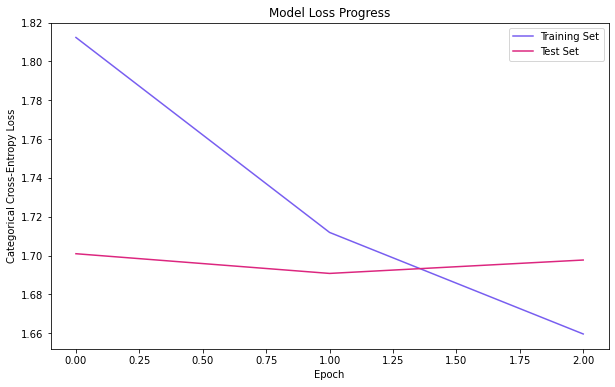

In [12]:
fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.show()

In [15]:
lstm.save("version_2.h5")

In [10]:
def prediction(x_test):
    y_pred = model.predict(x_test)
    pred = list(np.argmax(y_pred, axis=1))
    return pred

In [11]:
test_data = pd.read_csv("seq_test.csv", header=None,chunksize = 100000,skiprows=1)
count=0
for df in test_data:
    result=[]
    df=df[1].str.split(' ',expand=True)
    x = df.to_numpy()
    x = x.astype('float32')
    filename= "test"+str(count)+".csv"
    result=prediction(x)
    df_result = pd.DataFrame(result)
    df_result.to_csv(filename)
    count=count+1

In [ ]:
import glob

In [ ]:
all_files = glob.glob("C:\Users\sadia_tisha1\Desktop\NLP Assignment" + "/*.csv")

In [ ]:
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "samplesubmission.csv")